## AI for finance [IE471 / IE 412]

#### Hands-on Practice on Session #1
#### [Session 1] Interest risk modeling via PCA(Principal component analysis)
##### Main assistant for this Session: Yoontae Hwang, E-mail: yoontae@unist.ac.kr

1. Introduction to PCA
2. Data
3. Visualization of Yield curve
4. PCA applied to finance
    - 4.1. PCA Using Sklearn package
    - 4.2. What is Level, Slope and Curvature?
    - 4.3. Correlation coefficient between PCA and original value
    - 4.4. PCA Analysis [HW] 
5. [advanced] Autoencoder
    - 5.1. Linear Autoencoder

### 1. Introduction to PCA

![img](https://drive.google.com/uc?id=1xWE6wD65Pv9NPtkutH2TbE6y_ibdvJYE)
- PCA is the bedrock dimensionality reduction technique for probability and statistics.
- It’s still commonly used in machine learning applications when you have big data that might have some statistical distribution and you want to uncover the low dimensional patterns to build models.


### 2. Data


- in this chapter, we use the daily treasury par yield curve rate in U.S. department of the treasury. Data can be found at the following links: [Click yield curve rate Dataset]("https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldAll")
- If you are interested in python crawling, you can easily collect data using beautifulsoup package. 

In [ ]:
import numpy as np
import pandas as pd
import requests
import datetime
import os
from bs4 import BeautifulSoup

In [ ]:
bond_data  = pd.read_csv('./bond_data.csv')

In [ ]:
bond_data

Date  1 Mo  2 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  \
0     2007-01-02  4.79  4.93  5.07  5.11  5.00  4.80  4.71  4.68  4.68   4.68   
1     2007-01-03  4.84  4.94  5.05  5.09  4.98  4.76  4.69  4.66  4.66   4.67   
2     2007-01-04  4.80  4.92  5.04  5.07  4.95  4.71  4.63  4.61  4.61   4.62   
3     2007-01-05  4.81  4.93  5.05  5.09  4.98  4.76  4.68  4.65  4.65   4.65   
4     2007-01-08  4.87  4.97  5.08  5.13  5.01  4.78  4.70  4.66  4.66   4.66   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
3761  2022-01-14  0.05  0.05  0.13  0.30  0.51  0.99  1.26  1.55  1.72   1.78   
3762  2022-01-18  0.05  0.06  0.16  0.37  0.58  1.06  1.35  1.65  1.82   1.87   
3763  2022-01-19  0.05  0.06  0.17  0.36  0.57  1.04  1.33  1.62  1.78   1.83   
3764  2022-01-20  0.05  0.09  0.17  0.36  0.60  1.08  1.34  1.62  1.77   1.83   
3765  2022-01-21  0.05  0.08  0.17  0.35  0.58  1.01  1.28  1.54  1.70   1.75   

      20 Yr  30 Yr  
0      4.87   4.79  
1      4.85   4.77  
2      4.81   4.72  
3      4.84   4.74  
4      4.84   4.74  
...     ...    ...  
3761   2.18   2.12  
3762   2.24   2.18  
3763   2.20   2.14  
3764   2.19   2.14  
3765   2.13   2.07  

[3766 rows x 13 columns]

### 3. Visualization of Yield curve

- Yield curve represent several interest rates across different maturities. 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

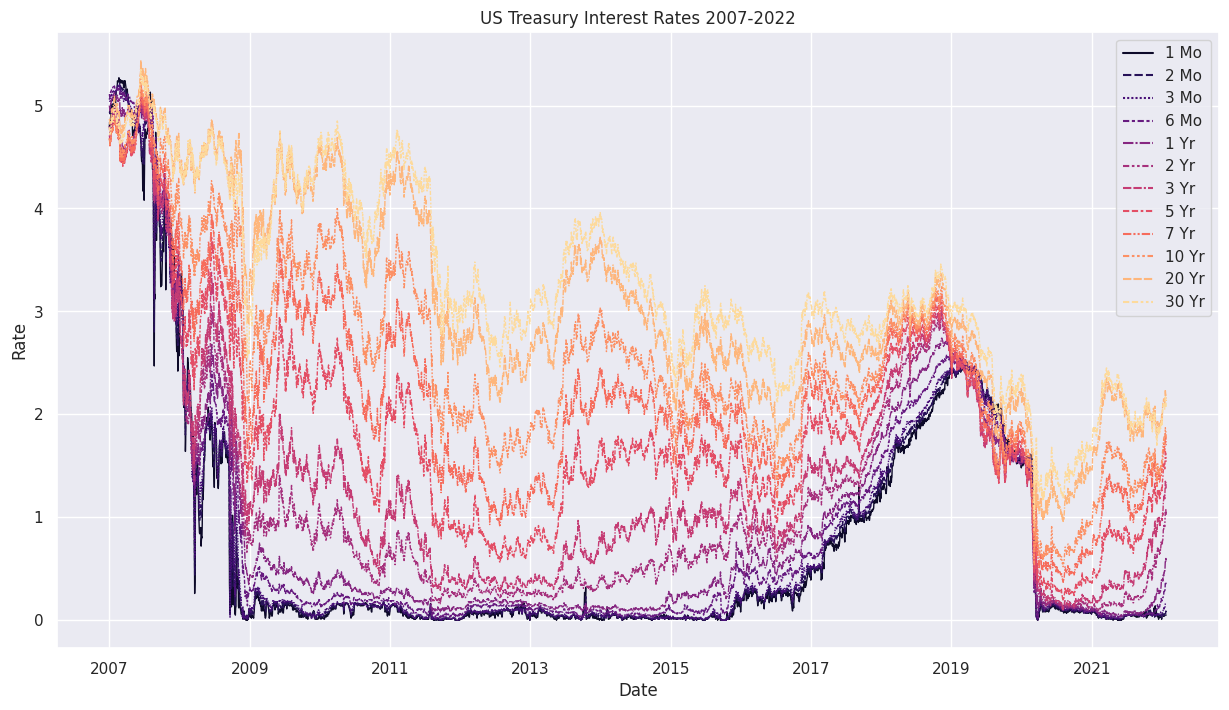

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=bond_data,  linewidth=1.0, palette = "magma")
plt.xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
plt.title("US Treasury Interest Rates 2007-2022")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.savefig("Figure_1.png")
plt.show()

### 4. PCA applied to finance

* Principal Component Analysis (PCA) quantifies movements in a specific market. Consider bonds with different maturities. Changes in the yield curve do not move randomly, but are influenced by specific rules. for example, investors often refer to movements in the yield curve in  terms of three driving factors: **level**, **slope**, and **curvature**. PCA formalizes this viewpoint and allows us to evaluate when a sector of the yield curve has cheapened or richened beyond that prescribed by recent yield movements. 

- the first principal component records an almost parallel shift of the yield curve
- the second one a change in the slope (tilt)
- the third one a change located in the middle of the term structure (curvature or convexity).


- PC1(Level)
- PC2(Slope)
- PC3(Curvature)

### 4-1. PCA Using Sklearn package

- Sklearn Link : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
from sklearn.decomposition import PCA     # import PCA package

def PCA_analysis(data, norm = False, n_pcs = 10):
    rate_dataset = data.iloc[:, 1:]              # Exclude date columns
    
    if norm == True:
        rate_dataset -= rate_dataset.mean(axis=0)
    else:
        pass
    
    pca = PCA(n_components=n_pcs, svd_solver = "auto", random_state = 2022) 
    pcs_overtime = pca.fit_transform(rate_dataset)
    pcs_overtime_df = pd.DataFrame(data=pcs_overtime)
    
    pcs_shape_df = pd.DataFrame(pca.components_).T
    
    print('explained variance ratio :', pca.explained_variance_ratio_.cumsum()[0:5])
    
    return pcs_shape_df, pcs_overtime_df


In [ ]:
pc_shape, pc_overtime = PCA_analysis(bond_data, norm = True, n_pcs= 10)

explained variance ratio : [0.83620936 0.98533581 0.99707104 0.99880827 0.99935413]


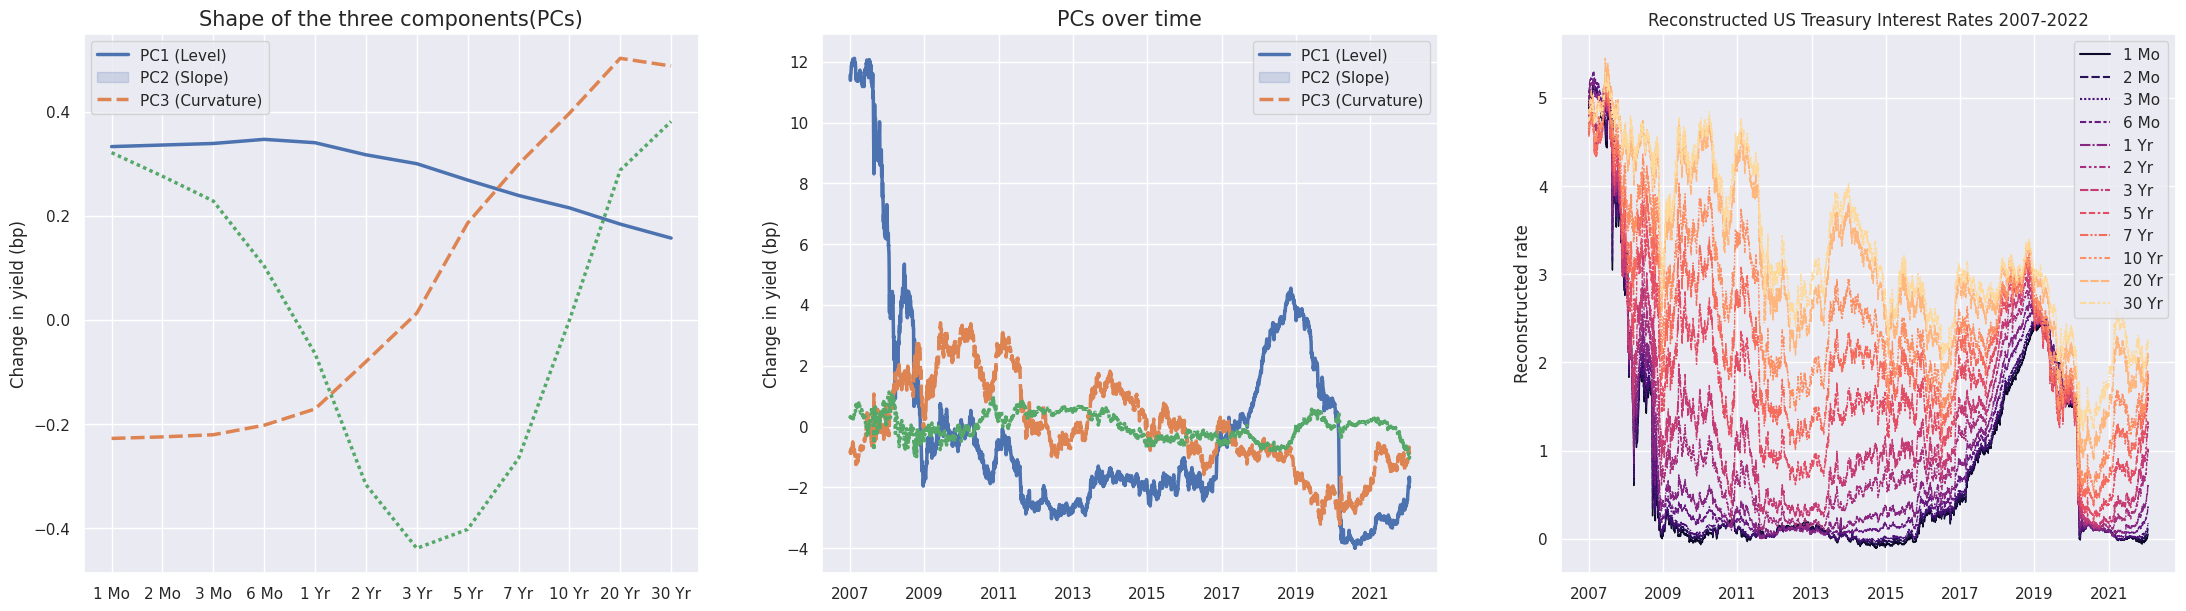

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(27,7))

sns.lineplot(data=pc_shape.iloc[:, :3],  linewidth=2.5, ax = axes[0])
axes[0].set_title("Shape of the three components(PCs)", fontsize = 15)
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],['1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',  '10 Yr', '20 Yr', '30 Yr'])
axes[0].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])

sns.lineplot(data=pc_overtime.iloc[:, :3],  linewidth=2.5, ax = axes[1])
axes[1].set_title("PCs over time", fontsize = 15)
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[1].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])


reconst = pd.DataFrame(np.dot(pc_overtime.iloc[:, :3].values, pc_shape.iloc[:, :3].values.T), index=bond_data.index, columns=bond_data.columns[1:])
reconst += bond_data.iloc[:, 1:].mean(axis = 0 )
sns.lineplot(data=reconst,  linewidth=1.0, palette = "magma")
axes[2].set_title("Reconstructed US Treasury Interest Rates 2007-2022", fontsize = 12)
axes[2].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[2].set_ylabel("Reconstructed rate", fontsize = 12)
plt.savefig("Figure_2.png")

plt.show()

pc_overtime_copy = pc_overtime

### 4-2. What is Level, Slope and Curvature?

![image.png](https://drive.google.com/uc?id=1_B2hKqA7dDr4GAmClPuh176Siks_KjWx)

- **Level**

It indicates the *absolute level of interest rates*, and is mainly used to indicate the direction of the yield.
When *interest rates rise (fall)* and *prices fall (rise)*, it represents a *bear* (bull) movement.
- **Slope**

It indicates *the degree of interest rate spread* and is used as an indicator of opportunities for arbitrage trading due to distortion of the interest rate period structure.
If long-term interest rates minus short-term interest rates are >= 0, it shows a steepening movement. In the opposite case, flattening motion is shown.
When *long-term interest rates rise and short-term interest rates fall*, it is *steepening*, and vice versa is called flattening.
- **Curvature**

The case where neither the *parallel shift(Level) nor the slope change is explained*. This indicates that the shape of the yield curve changes as the curvature changes.

### 4-3. Correlation coefficient between PCA and original value

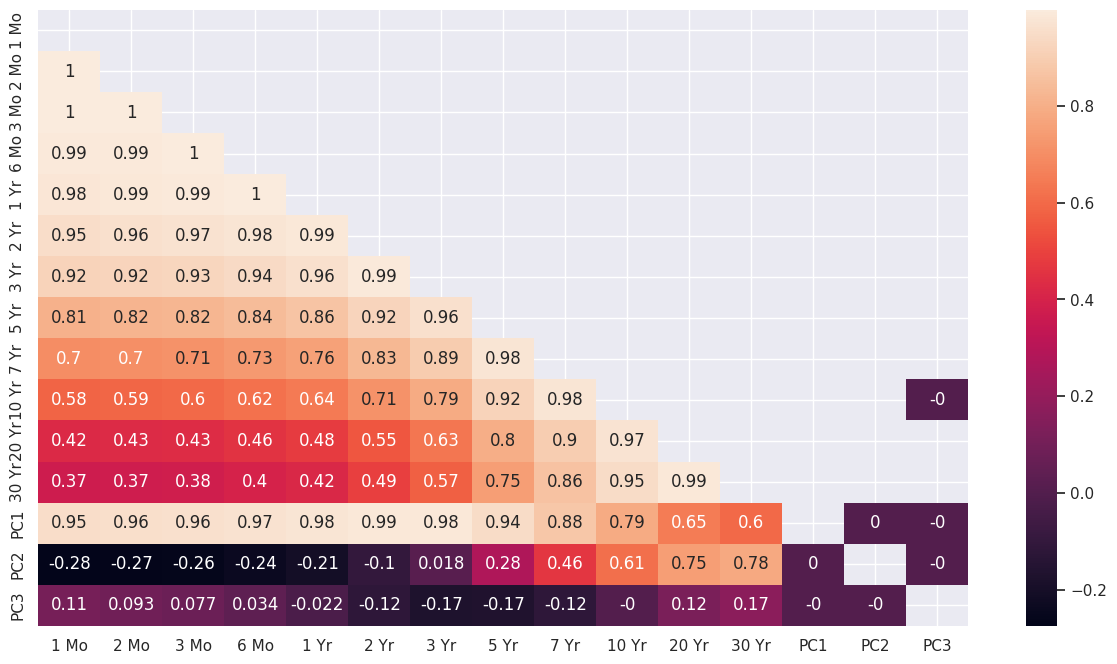

In [ ]:
pc_overtime = pc_overtime.iloc[:, :3]
pc_overtime.columns = ["PC1", "PC2", "PC3"]    

corr_data = pd.concat([bond_data.iloc[:, 1:], pc_overtime], axis = 1).corr().round(3)
mask_upper = np.triu(corr_data)
sns.heatmap(corr_data, annot = True, mask = mask_upper)
plt.savefig("Figure_4.png")


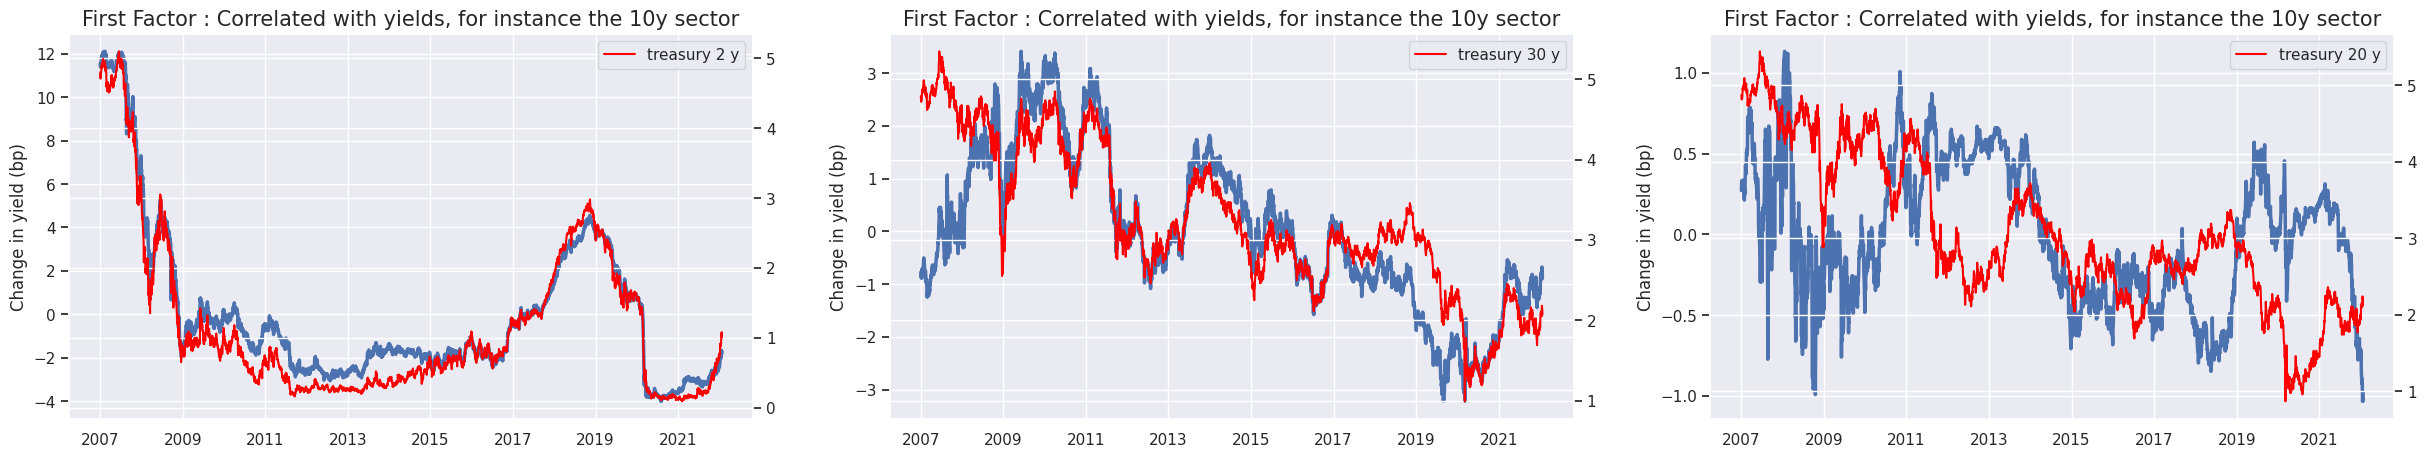

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30,5))

sns.lineplot(data=pc_overtime.iloc[:, 0],  linewidth=2.5, ax = axes[0])
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_title("First Factor : Correlated with yields, for instance the 10y sector", fontsize = 15)
axes[0].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
#axes[0].legend(labels=["PC1 (Level)"])

ax2 = axes[0].twinx()
ax2.plot(bond_data.iloc[:, 1:]["2 Yr"], color='red')
ax2.legend(labels=["treasury 2 y"])


sns.lineplot(data=pc_overtime.iloc[:, 1],  linewidth=2.5, ax = axes[1])
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_title("First Factor : Correlated with yields, for instance the 10y sector", fontsize = 15)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
#axes[0].legend(labels=["PC1 (Level)"])

ax2 = axes[1].twinx()
ax2.plot(bond_data.iloc[:, 1:]["30 Yr"], color='red')
ax2.legend(labels=["treasury 30 y"])


sns.lineplot(data=pc_overtime.iloc[:, 2],  linewidth=2.5, ax = axes[2])
axes[2].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[2].set_title("First Factor : Correlated with yields, for instance the 10y sector", fontsize = 15)
axes[2].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
#axes[0].legend(labels=["PC1 (Level)"])

ax2 = axes[2].twinx()
ax2.plot(bond_data.iloc[:, 1:]["20 Yr"], color='red')
ax2.legend(labels=["treasury 20 y"])
plt.savefig("Figure_5.png")


### 4-4. PCA Analysis [HW]

In [ ]:
import scipy

def PCA_solver(df, num_reconstruct):
    
    dataset = df.copy()
    
    # Fill in the code! 
    # Step 1   : Compute mean-centered data matr
    mean_centered = dataset - np.mean(df, axis=0)
    # Step 2-1 : Compute Covariance matrix 
    cov_matrix = np.cov(dataset, rowvar=False)
    # Step 2-2 : Use the function scipy.linalg.eigh
    eigenvals, eigenvecs = scipy.linalg.eigh(cov_matrix)
    
    eigenvecs = eigenvecs[:, np.argsort(eigenvals)[::-1]]
    eigenvals = eigenvals[np.argsort(eigenvals)[::-1]]
    eigenvecs = eigenvecs[:, :num_reconstruct]

    return np.dot(eigenvecs.T, df.T).T, eigenvals, eigenvecs

In [ ]:
bond_data = pd.read_csv("bond_data.csv").iloc[:, 1:]

scores, evals, evecs = PCA_solver(bond_data, 3)

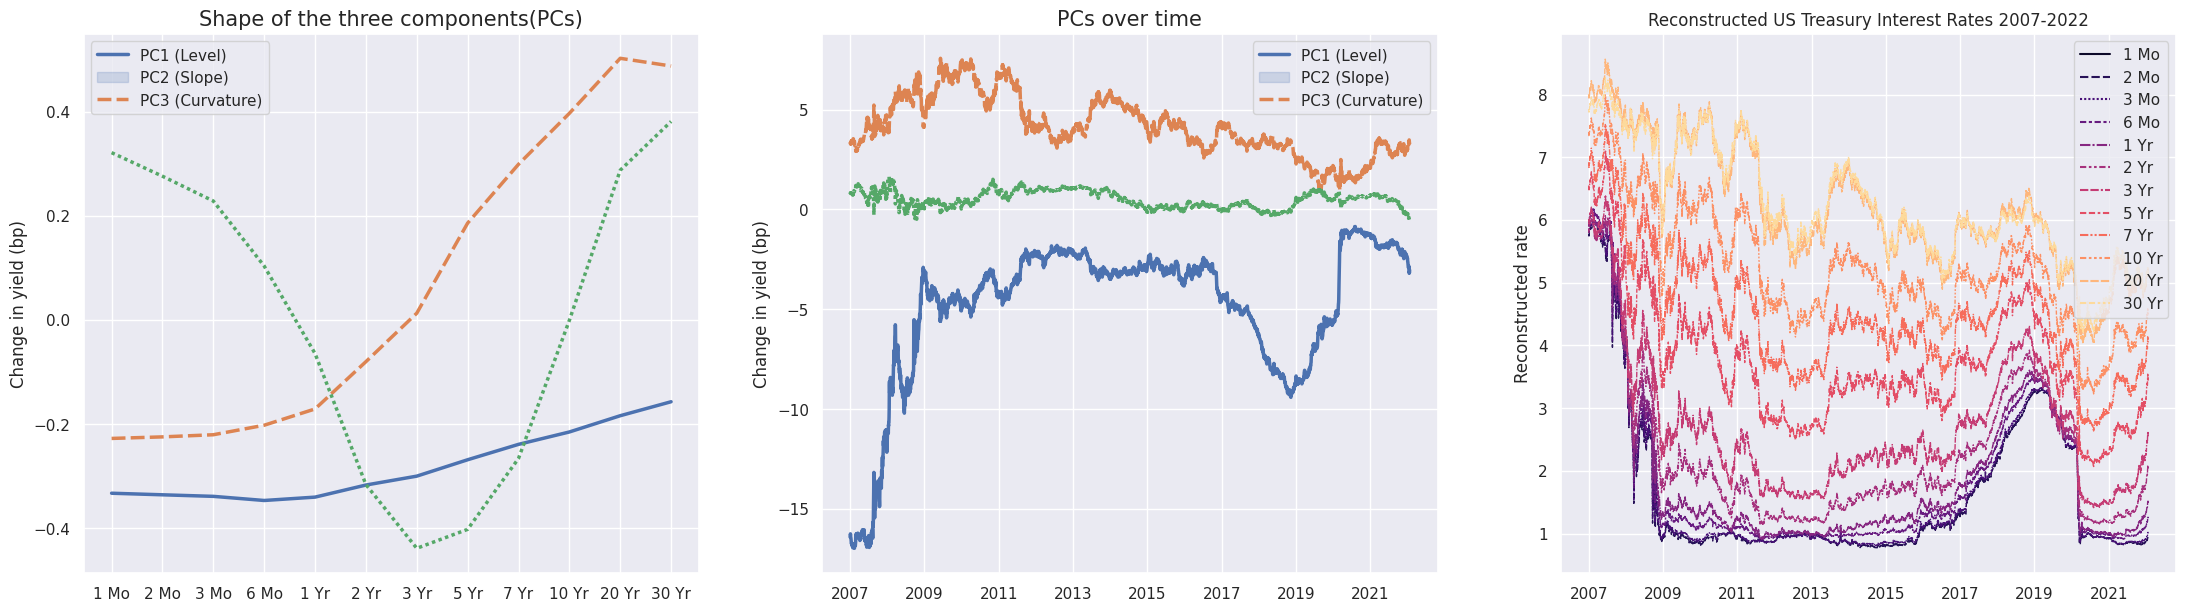

In [ ]:
evecs = pd.DataFrame(evecs)
score = pd.DataFrame(scores)

fig, axes = plt.subplots(1, 3, figsize=(27,7))

sns.lineplot(data=evecs.iloc[:, :3],  linewidth=2.5, ax = axes[0])
axes[0].set_title("Shape of the three components(PCs)", fontsize = 15)
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],['1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',  '10 Yr', '20 Yr', '30 Yr'])
axes[0].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])

sns.lineplot(data=score.iloc[:, :3],  linewidth=2.5, ax = axes[1])
axes[1].set_title("PCs over time", fontsize = 15)
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[1].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])


reconst = pd.DataFrame(np.dot(scores,evecs.T), index=bond_data.index, columns=bond_data.columns)
reconst += bond_data.iloc[:, 1:].mean(axis = 0 )
sns.lineplot(data=reconst,  linewidth=1.0, palette = "magma")
axes[2].set_title("Reconstructed US Treasury Interest Rates 2007-2022", fontsize = 12)
axes[2].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[2].set_ylabel("Reconstructed rate", fontsize = 12)

plt.savefig("Figure_7.png")

plt.show()

## [Advanced] 5. Autoencoder

![image.png](https://drive.google.com/uc?id=17CIHo-9f0bcOhWBGnIcCkqdr_8b07xDP)

Source :KB Kim, *YT Hwang*, DC Lim, SH Kim, JH Lee, and *YJ Lee*, (2022), Diagnosis and Prescription for Household Financial Health via Risk Information embedded Hierarchical AutoEncoder and Its Post-hoc Analysis, working paper

- An autoencoder (AE) is a dimension reduction technique based on artificial neural networks and is often referred to as a deep learning version of principal component analysis (PCA), one of the most popular dimension reduction methods. While PCA is only able to capture linear dependence structures within data, AE is known to capture complex non-linear dependencies well. 
- The AE is composed of an encoder function $f_{ENC}: R^d→R^k$ and a decoder function $f_{DEC}: R^d→R^k$. The encoder function $f_{ENC}$ is a mapping from high-dimensional data $Χ∈R^{(N×d)}$ with N samples and d features to corresponding embeddings $Z∈R^{(N×k)}$ in a k-dimensional latent space with $k≪d$. The decoder function $f_{DEC}$ is a mapping from embeddings $Z∈R^{(N×k)}$ to the original data $Χ∈R^{(N×d)}$. AE is trained to minimize the following reconstruction loss:

$$l_{AE}= ∥Χ-f_{DEC} (f_{ENC} (Χ)) ∥_F^2$$

where $∥∙∥_F^2$ is the Frobenius norm. 

### 5-1. Linear Autoencoder

In [ ]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.backends.cudnn as cudnn
from tqdm import tqdm
import random

seed = 2022
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
cudnn.benchmark = False
cudnn.deterministic = True

#### Simple dataloaer

In [ ]:
class bondDataloader(Dataset):
    def __init__(self, csvdata):
        self.dataset = csvdata.values
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        
        return torch.tensor(self.dataset[idx], dtype = torch.float32)
        

#### Hyperparameter

In [ ]:
device = torch.device("cuda:0")
batch_size = 64
learning_rate = 1e-3
epochs = 20 

In [ ]:
bond_data = pd.read_csv("bond_data.csv")
bond_data = bond_data.iloc[:, 1:] - bond_data.iloc[:, 1:].mean(axis=0)

train_dataset = bondDataloader(bond_data)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,shuffle=True)
test_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,shuffle=False)

#### Model

In [ ]:
class LinearAE(nn.Module):
    def __init__(self):
        super(LinearAE, self).__init__()
        
        self.encoder = nn.Sequential(
                nn.Linear(12, 10, bias = False),
        )
        
        self.decoder =  nn.Sequential(
               nn.Linear(10, 12, bias = False),
        )
        
    
    def forward(self, bond_input):
        encoder_output = self.encoder(bond_input)
        decoder_output = self.decoder(encoder_output)
        return encoder_output, decoder_output

In [ ]:
autoencoder = LinearAE()
autoencoder = autoencoder.to(device)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr = learning_rate)
criterion = nn.MSELoss()

#### Learning

In [ ]:
def train_step(batch_item):
    bond_batch_x = batch_item.to(device)
    bond_batch_y = batch_item.to(device)
    
    autoencoder.train()
    optimizer.zero_grad()

    encoder, decoder = autoencoder(bond_batch_x)
    loss = criterion(decoder, bond_batch_y)
    
    loss.backward()
    optimizer.step()
        
    return loss

In [ ]:
for epoch in range(epochs):
    total_loss = 0
    
    tqdm_dataset = tqdm(enumerate(train_dataloader))
        
    for batch, batch_item in tqdm_dataset:
        batch_loss = train_step(batch_item)
        total_loss += batch_loss
        
        tqdm_dataset.set_postfix({
                'Epoch': epoch + 1,
                'Loss': '{:06f}'.format(batch_loss.item()),
                'Mean Loss' : '{:06f}'.format(total_loss/(batch+1))
            })
            

59it [00:00, 74.94it/s, Epoch=1, Loss=0.628597, Mean Loss=1.043537]
59it [00:00, 231.03it/s, Epoch=2, Loss=0.189057, Mean Loss=0.368367]
59it [00:00, 235.51it/s, Epoch=3, Loss=0.067643, Mean Loss=0.105607]
59it [00:00, 226.98it/s, Epoch=4, Loss=0.039107, Mean Loss=0.048583]
59it [00:00, 227.34it/s, Epoch=5, Loss=0.024055, Mean Loss=0.030111]
59it [00:00, 235.13it/s, Epoch=6, Loss=0.026412, Mean Loss=0.021494]
59it [00:00, 236.69it/s, Epoch=7, Loss=0.013391, Mean Loss=0.017496]
59it [00:00, 235.75it/s, Epoch=8, Loss=0.014501, Mean Loss=0.015580]
59it [00:00, 231.46it/s, Epoch=9, Loss=0.018307, Mean Loss=0.014361]
59it [00:00, 222.11it/s, Epoch=10, Loss=0.011360, Mean Loss=0.013270]
59it [00:00, 222.11it/s, Epoch=11, Loss=0.012699, Mean Loss=0.012233]
59it [00:00, 219.26it/s, Epoch=12, Loss=0.010211, Mean Loss=0.011204]
59it [00:00, 219.81it/s, Epoch=13, Loss=0.009579, Mean Loss=0.010203]
59it [00:00, 214.13it/s, Epoch=14, Loss=0.011092, Mean Loss=0.009252]
59it [00:00, 222.20it/s, Epoch

In [ ]:
def predict(dataset):
    autoencoder.eval()
    tqdm_dataset = tqdm(enumerate(dataset))
    results = []
    for batch, batch_item in tqdm_dataset:
        bond_batch_x = batch_item.to(device)

        with torch.no_grad():
            encoder, decoder = autoencoder(bond_batch_x)
                        
        results.extend(encoder.cpu().numpy())

    return results

preds = predict(test_dataloader)

59it [00:00, 1292.46it/s]


In [ ]:
AE_PCs = pd.DataFrame(preds)

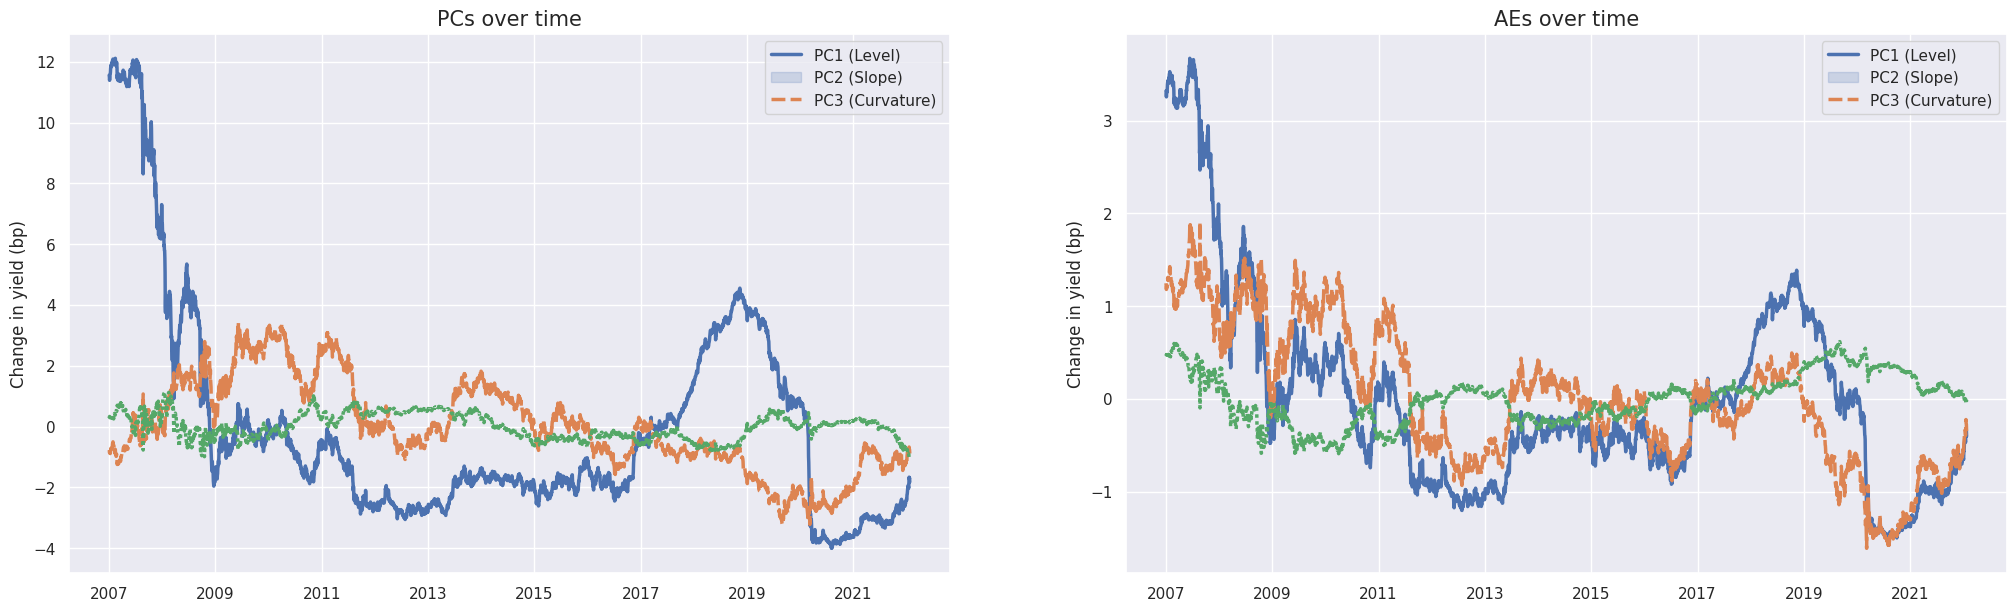

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25,7))

sns.lineplot(data=pc_overtime_copy.iloc[:, :3],  linewidth=2.5, ax = axes[0])
axes[0].set_title("PCs over time", fontsize = 15)
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[0].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])

AE_data = AE_PCs.iloc[:, :3]
AE_data.columns = ["AE_PC1" ,"AE_PC3", "AE_PC2"] # for ordering
AE_data = AE_data[["AE_PC1", "AE_PC2", "AE_PC3"]]

sns.lineplot(data=AE_data,  linewidth=2.5, ax = axes[1])
axes[1].set_title("AEs over time", fontsize = 15)
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[1].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])
plt.savefig("Figure_8.png")

plt.show()

In [ ]:
AE_PCA_corr = pd.concat([pc_overtime, AE_data], axis = 1).corr().round(3)
AE_PCA_corr

PC1    PC2    PC3  AE_PC1  AE_PC2  AE_PC3
PC1     1.000  0.000 -0.000   0.980   0.661   0.332
PC2     0.000  1.000 -0.000   0.167   0.739  -0.911
PC3    -0.000 -0.000  1.000  -0.093  -0.127   0.231
AE_PC1  0.980  0.167 -0.093   1.000   0.783   0.151
AE_PC2  0.661  0.739 -0.127   0.783   1.000  -0.483
AE_PC3  0.332 -0.911  0.231   0.151  -0.483   1.000

## Question 2

Apply a different dimension reduction algorithm (i.e., not PCA) and compare the results with PCA. You can use only the methods that are included in Sklearn package1.

In [ ]:
from sklearn.manifold import TSNE

def TSNE_solver(df, n_components):
  tsne = TSNE(n_components=n_components, random_state=2022)
  tsne_result = tsne.fit_transform(df)
  return tsne_result

In [ ]:
bond_data = pd.read_csv("bond_data.csv").iloc[:, 1:]
tsne_result = TSNE_solver(bond_data, 3)
tsne_result_df = pd.DataFrame(tsne_result, columns=["TSNE1", "TSNE2", "TSNE3"])

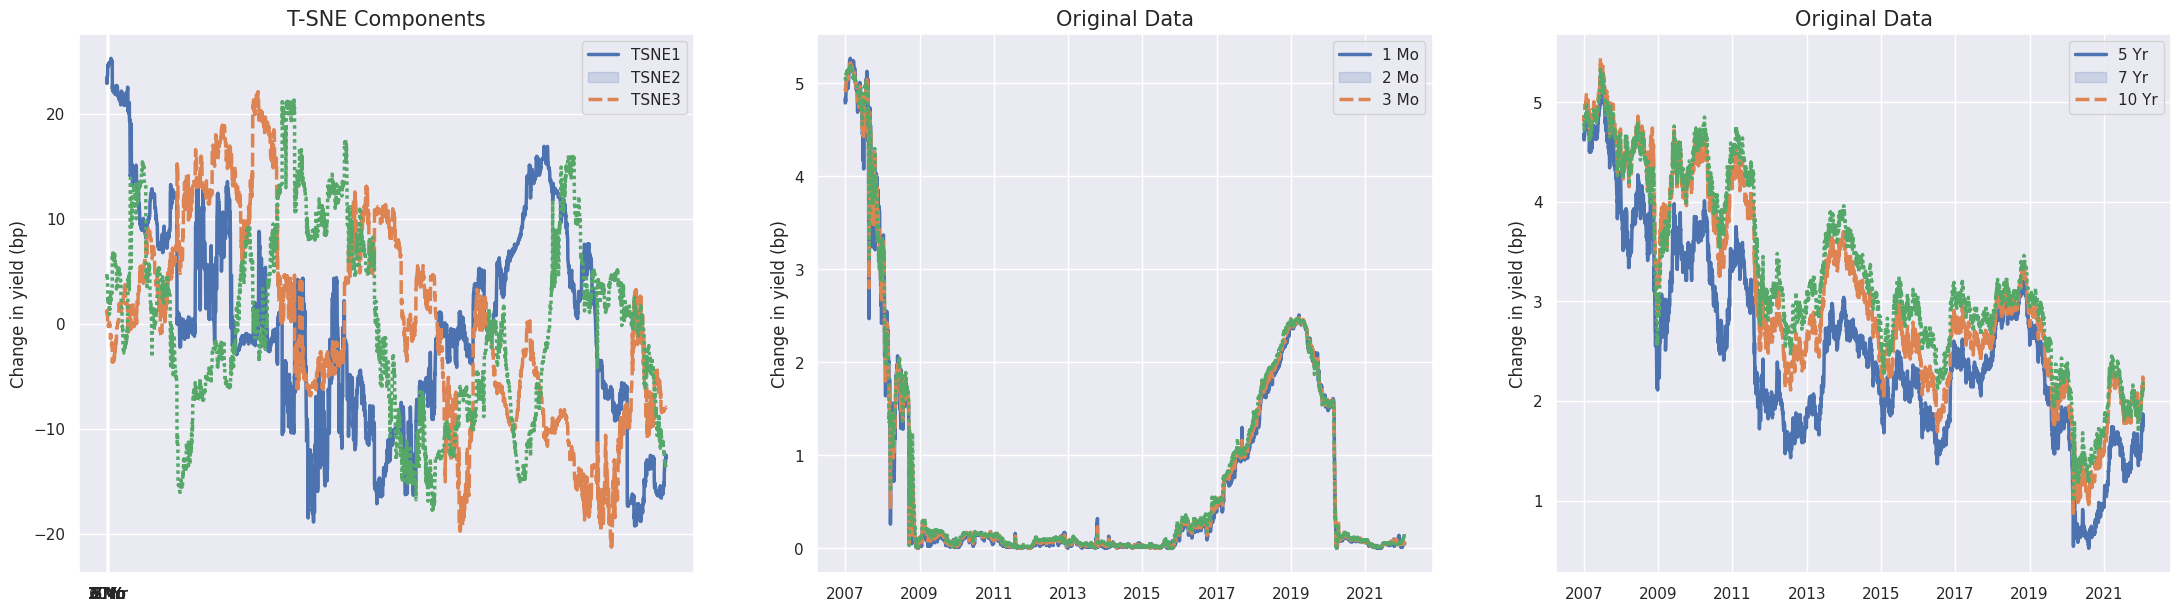

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(27,7))

sns.lineplot(data=tsne_result_df.iloc[:, :3], linewidth=2.5, ax = axes[0])
axes[0].set_title("T-SNE Components", fontsize = 15)
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],['1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'])
axes[0].legend(labels=["TSNE1", "TSNE2", "TSNE3"])

sns.lineplot(data=bond_data.iloc[:, :3], linewidth=2.5, ax = axes[1])
axes[1].set_title("Original Data", fontsize = 15)
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[1].legend(labels=["1 Mo", "2 Mo", "3 Mo"])

sns.lineplot(data=bond_data.iloc[:, -3:], linewidth=2.5, ax = axes[2])
axes[2].set_title("Original Data", fontsize = 15)
axes[2].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[2].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[2].legend(labels=["5 Yr", "7 Yr", "10 Yr"])

plt.savefig("Figure_9.png")

plt.show()

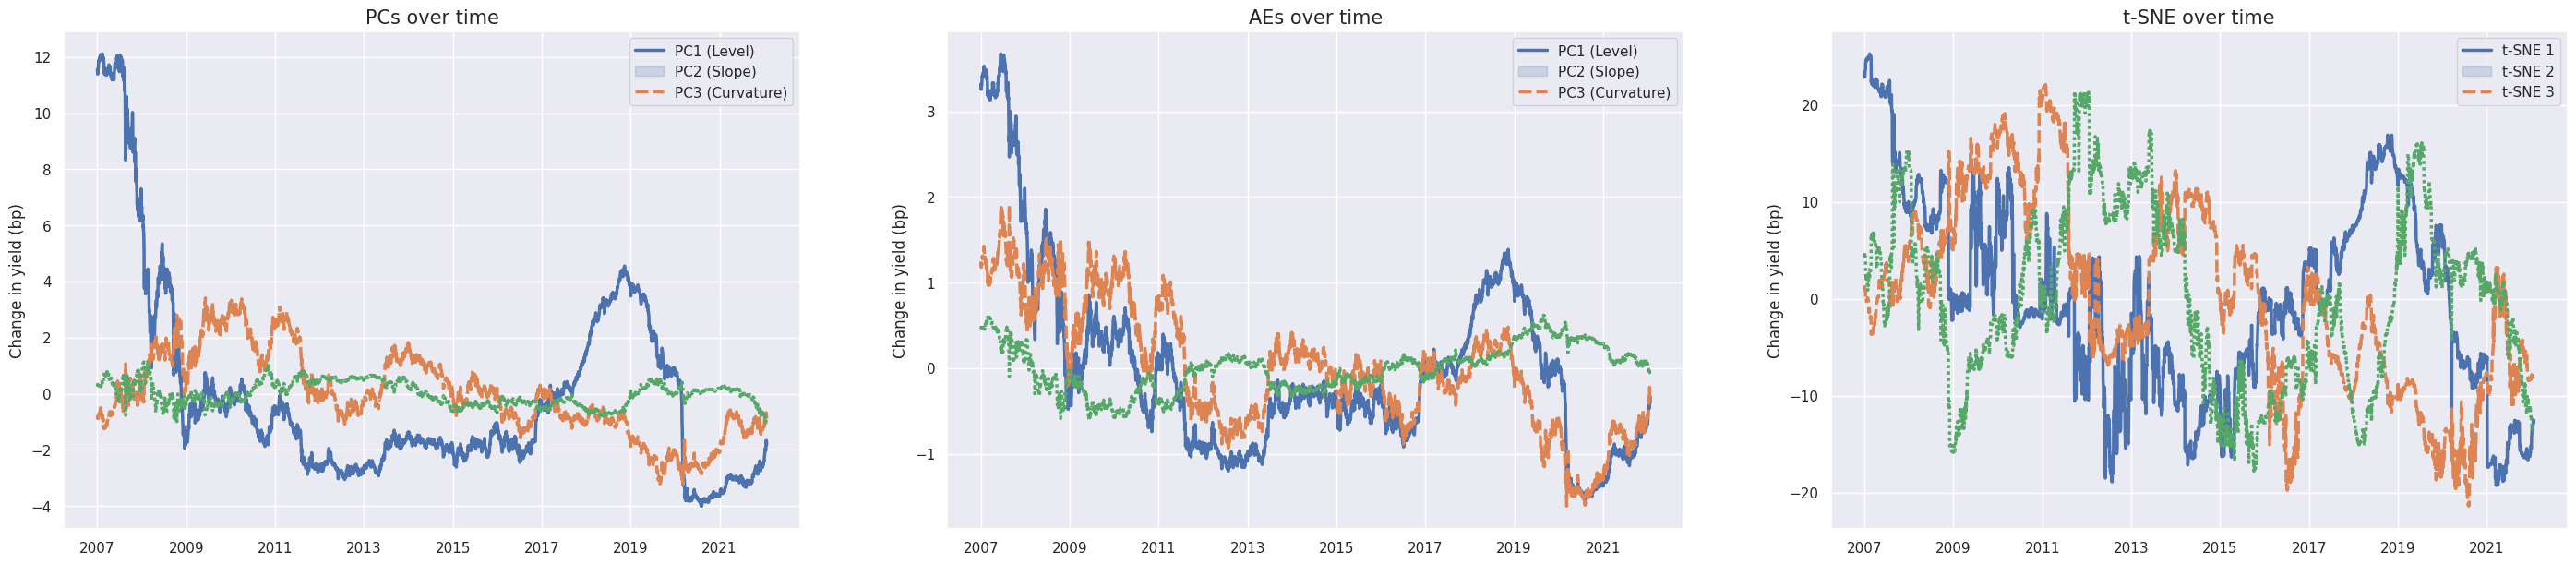

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(35,7))

sns.lineplot(data=pc_overtime_copy.iloc[:, :3], linewidth=2.5, ax = axes[0])
axes[0].set_title("PCs over time", fontsize = 15)
axes[0].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[0].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[0].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])

AE_data = AE_PCs.iloc[:, :3]
AE_data.columns = ["AE_PC1" ,"AE_PC3", "AE_PC2"] # for ordering
AE_data = AE_data[["AE_PC1", "AE_PC2", "AE_PC3"]]

sns.lineplot(data=AE_data, linewidth=2.5, ax = axes[1])
axes[1].set_title("AEs over time", fontsize = 15)
axes[1].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[1].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[1].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])

tsne_data = tsne_result_df.iloc[:, :3]
tsne_data.columns = ["t-SNE 1" ,"t-SNE 2", "t-SNE 3"] # for ordering
tsne_data = tsne_data[["t-SNE 1", "t-SNE 2", "t-SNE 3"]]
sns.lineplot(data=tsne_data, linewidth=2.5, ax = axes[2])
axes[2].set_title("t-SNE over time", fontsize = 15)
axes[2].set_ylabel("Change in yield (bp)", fontsize = 12)
axes[2].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[2].legend(labels=["t-SNE 1", "t-SNE 2", "t-SNE 3"])

plt.savefig("Figure_10.png")
plt.show()

In [ ]:
pc_tsne_concat = pd.concat([pc_overtime, tsne_result_df], axis=1)
pc_tsne_corr = pc_tsne_concat.corr().round(3)

# Compare Correlation matrices
print("PCA correlation matrix:\n", pc_overtime.corr().round(3))
print("\n")
print("t-SNE correlation matrix:\n", tsne_result_df.corr().round(3))
print("\n")
print("Correlation matrix of PCA and t-SNE concatenated:\n", pc_tsne_corr)

PCA correlation matrix:
      PC1  PC2  PC3
PC1  1.0  0.0 -0.0
PC2  0.0  1.0 -0.0
PC3 -0.0 -0.0  1.0


t-SNE correlation matrix:
        TSNE1  TSNE2  TSNE3
TSNE1  1.000  0.016  0.044
TSNE2  0.016  1.000 -0.068
TSNE3  0.044 -0.068  1.000


Correlation matrix of PCA and t-SNE concatenated:
          PC1    PC2    PC3  TSNE1  TSNE2  TSNE3
PC1    1.000  0.000 -0.000  0.835  0.032  0.095
PC2    0.000  1.000 -0.000  0.078  0.931 -0.108
PC3   -0.000 -0.000  1.000 -0.098  0.109  0.807
TSNE1  0.835  0.078 -0.098  1.000  0.016  0.044
TSNE2  0.032  0.931  0.109  0.016  1.000 -0.068
TSNE3  0.095 -0.108  0.807  0.044 -0.068  1.000


In [ ]:
def tSNE_analysis(data, n_components = 2, perplexity = 30, n_iter = 1000, random_state = 2022):
    rate_dataset = data.iloc[:, 1:]              # Exclude date columns

    tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter, random_state=random_state)
    tsne_transformed = tsne.fit_transform(rate_dataset)

    tsne_df = pd.DataFrame(data=tsne_transformed, columns=['tSNE_{}'.format(i) for i in range(1, n_components+1)])
    return tsne_df

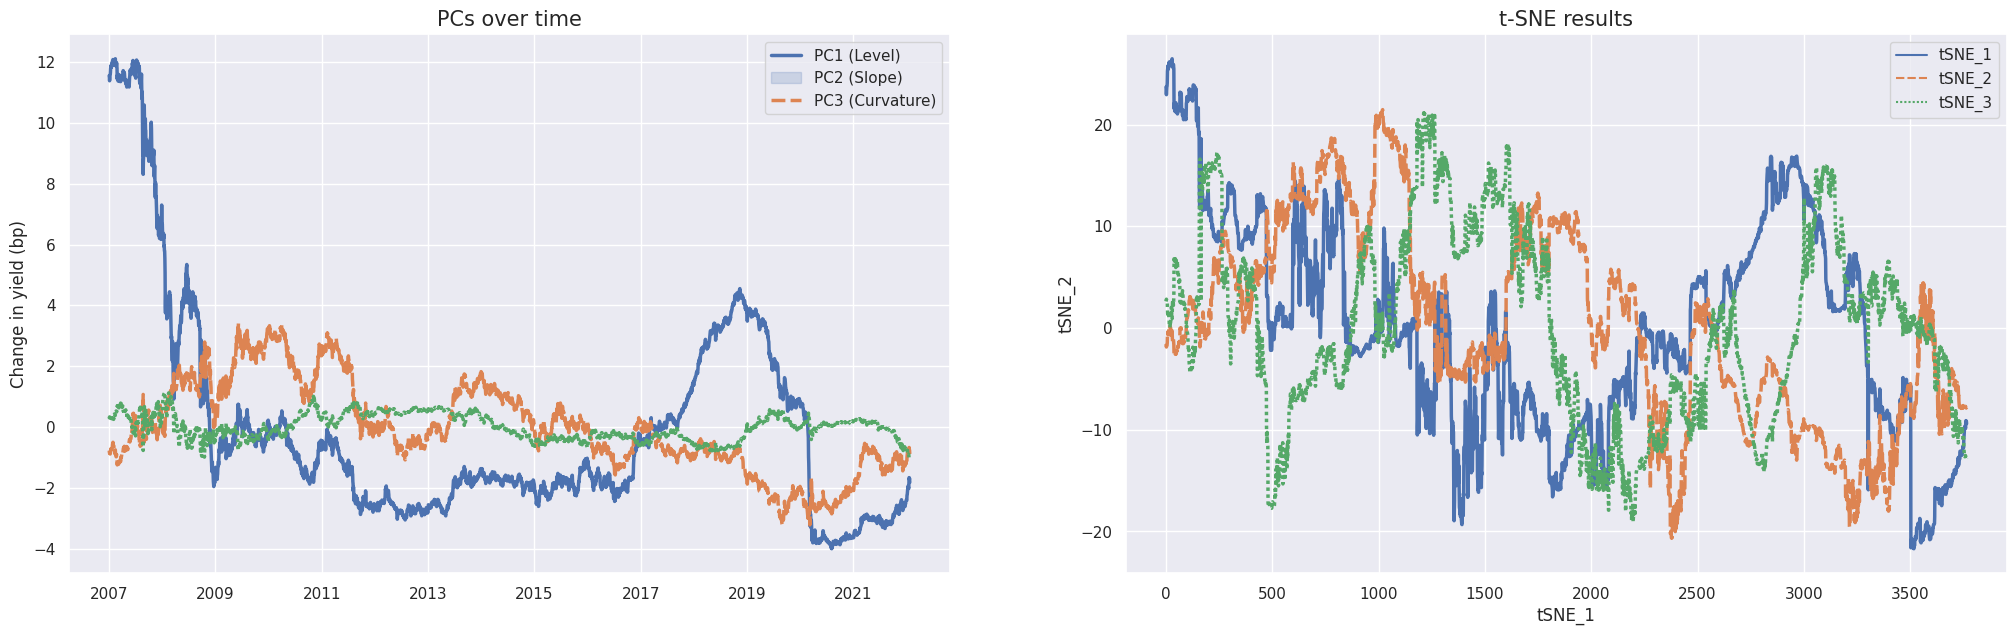

In [ ]:
tsne_df = tSNE_analysis(data=bond_data, n_components=3, perplexity=30, n_iter=1000, random_state=2022)


fig, axes = plt.subplots(1, 2, figsize=(25,7))

# PCA plot
sns.lineplot(data=pc_overtime_copy.iloc[:, :3], linewidth=2.5, ax=axes[0])
axes[0].set_title("PCs over time", fontsize=15)
axes[0].set_ylabel("Change in yield (bp)", fontsize=12)
axes[0].set_xticks([0,500,1000,1500,2000,2500,3000,3500],['2007','2009','2011','2013','2015','2017','2019','2021'])
axes[0].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])

# t-SNE plot
sns.lineplot(data=tsne_df, linewidth=2.5, ax=axes[1])
axes[1].set_title("t-SNE results", fontsize=15)
axes[1].set_xlabel("tSNE_1", fontsize=12)
axes[1].set_ylabel("tSNE_2", fontsize=12)

plt.savefig("Figure_11.png")
plt.show()

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD

def truncatedSVD_analysis(data, norm=False, n_components=10):
    rate_dataset = data.iloc[:, 1:]              # Exclude date columns
    
    if norm == True:
        rate_dataset -= rate_dataset.mean(axis=0)
    else:
        pass
    
    svd = TruncatedSVD(n_components=n_components, random_state=2022)
    svd_overtime = svd.fit_transform(rate_dataset)
    svd_overtime_df = pd.DataFrame(data=svd_overtime)
    
    svd_shape_df = pd.DataFrame(svd.components_).T
    
    print('explained variance ratio:', svd.explained_variance_ratio_.cumsum()[0:n_components])
    
    return svd_shape_df, svd_overtime_df

explained variance ratio : [0.8295413  0.98582109 0.9973513  0.99883641 0.99944216]
explained variance ratio: [0.62762545 0.98360043 0.99660096 0.99844168 0.99939306 0.99973752
 0.99984327 0.99990212 0.99994892 0.99997505]


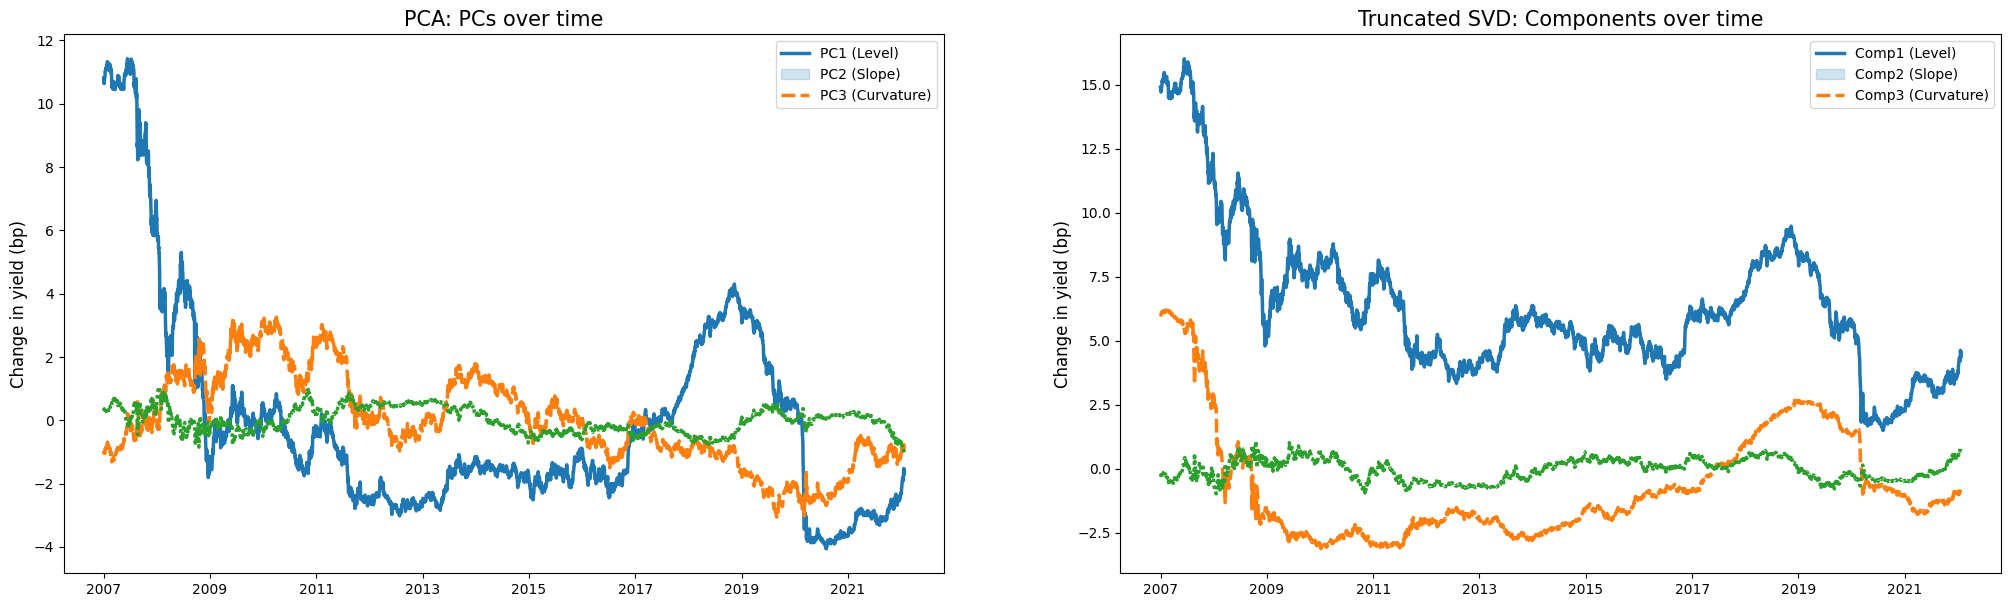

In [ ]:
import pandas as pd

# Perform PCA and truncated SVD
n_components = 3

bond_data = pd.read_csv("bond_data.csv").iloc[:, 1:]

# PCA
pca = PCA(n_components=n_components, svd_solver='full')
pca_shape_df, pca_overtime_df = PCA_analysis(bond_data)

# Truncated SVD
svd = TruncatedSVD(n_components=n_components, algorithm='randomized', random_state=2022)
svd_shape_df, svd_overtime_df = truncatedSVD_analysis(bond_data)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(25, 7))

# PCA plot
sns.lineplot(data=pca_overtime_df.iloc[:, :3], linewidth=2.5, ax=axes[0])
axes[0].set_title("PCA: PCs over time", fontsize=15)
axes[0].set_ylabel("Change in yield (bp)", fontsize=12)
axes[0].set_xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500],
                    ['2007', '2009', '2011', '2013', '2015', '2017', '2019', '2021'])
axes[0].legend(labels=["PC1 (Level)", "PC2 (Slope)", "PC3 (Curvature)"])

# Truncated SVD plot
sns.lineplot(data=svd_overtime_df.iloc[:, :3], linewidth=2.5, ax=axes[1])
axes[1].set_title("Truncated SVD: Components over time", fontsize=15)
axes[1].set_ylabel("Change in yield (bp)", fontsize=12)
axes[1].set_xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500],
                    ['2007', '2009', '2011', '2013', '2015', '2017', '2019', '2021'])
axes[1].legend(labels=["Comp1 (Level)", "Comp2 (Slope)", "Comp3 (Curvature)"])

plt.show()

In [ ]:
SVD_PCA_corr = pd.concat([pca_overtime_df, svd_overtime_df], axis=1).corr().round(3)

In [ ]:
SVD_PCA_corr

0      1      2      3      4      5      6      7      8      9  \
0  1.000  0.000  0.000  0.000  0.000 -0.000  0.000  0.000 -0.000  0.000   
1  0.000  1.000 -0.000 -0.000  0.000  0.000  0.000  0.000 -0.000 -0.000   
2  0.000 -0.000  1.000 -0.000  0.000  0.000  0.000  0.000  0.000 -0.000   
3  0.000 -0.000 -0.000  1.000 -0.000  0.000  0.000 -0.000  0.000 -0.000   
4  0.000  0.000  0.000 -0.000  1.000 -0.000  0.000  0.000 -0.000  0.000   
5 -0.000  0.000  0.000  0.000 -0.000  1.000 -0.000 -0.000 -0.000  0.000   
6  0.000  0.000  0.000  0.000  0.000 -0.000  1.000  0.000 -0.000  0.000   
7  0.000  0.000  0.000 -0.000  0.000 -0.000  0.000  1.000 -0.000  0.000   
8 -0.000 -0.000  0.000  0.000 -0.000 -0.000 -0.000 -0.000  1.000 -0.000   
9  0.000 -0.000 -0.000 -0.000  0.000  0.000  0.000  0.000 -0.000  1.000   
0  0.963  0.270  0.009  0.001 -0.001 -0.000  0.000  0.000  0.000 -0.000   
1  0.833 -0.553 -0.011 -0.002  0.001  0.000 -0.000 -0.000 -0.000  0.000   
2  0.162  0.321 -0.933 -0.019  0.016  0.004 -0.002 -0.001 -0.001  0.000   
3 -0.233 -0.434 -0.228  0.806 -0.229 -0.043  0.019  0.011  0.006 -0.000   
4  0.201  0.372  0.180  0.540  0.698  0.091 -0.032 -0.018 -0.010  0.000   
5  0.055  0.102  0.047  0.068 -0.268  0.952 -0.030 -0.016 -0.008  0.000   
6 -0.146 -0.270 -0.121 -0.147  0.370  0.192  0.796  0.224  0.108 -0.003   
7 -0.064 -0.118 -0.053 -0.062  0.148  0.069 -0.430  0.846  0.219 -0.003   
8  0.022  0.041  0.018  0.022 -0.050 -0.023  0.095  0.314 -0.941  0.002   
9  0.003  0.005  0.002  0.003 -0.006 -0.003  0.007  0.009  0.006  1.000   

       0      1      2      3      4      5      6      7      8      9  
0  0.963  0.833  0.162 -0.233  0.201  0.055 -0.146 -0.064  0.022  0.003  
1  0.270 -0.553  0.321 -0.434  0.372  0.102 -0.270 -0.118  0.041  0.005  
2  0.009 -0.011 -0.933 -0.228  0.180  0.047 -0.121 -0.053  0.018  0.002  
3  0.001 -0.002 -0.019  0.806  0.540  0.068 -0.147 -0.062  0.022  0.003  
4 -0.001  0.001  0.016 -0.229  0.698 -0.268  0.370  0.148 -0.050 -0.006  
5 -0.000  0.000  0.004 -0.043  0.091  0.952  0.192  0.069 -0.023 -0.003  
6  0.000 -0.000 -0.002  0.019 -0.032 -0.030  0.796 -0.430  0.095  0.007  
7  0.000 -0.000 -0.001  0.011 -0.018 -0.016  0.224  0.846  0.314  0.009  
8  0.000 -0.000 -0.001  0.006 -0.010 -0.008  0.108  0.219 -0.941  0.006  
9 -0.000  0.000  0.000 -0.000  0.000  0.000 -0.003 -0.003  0.002  1.000  
0  1.000  0.653  0.235 -0.342  0.295  0.082 -0.215 -0.094  0.033  0.004  
1  0.653  1.000 -0.032  0.047 -0.040 -0.011  0.029  0.013 -0.004 -0.001  
2  0.235 -0.032  1.000  0.017 -0.014 -0.004  0.011  0.005 -0.002 -0.000  
3 -0.342  0.047  0.017  1.000  0.021  0.006 -0.015 -0.007  0.002  0.000  
4  0.295 -0.040 -0.014  0.021  1.000 -0.005  0.013  0.006 -0.002 -0.000  
5  0.082 -0.011 -0.004  0.006 -0.005  1.000  0.004  0.002 -0.001 -0.000  
6 -0.215  0.029  0.011 -0.015  0.013  0.004  1.000 -0.004  0.001  0.000  
7 -0.094  0.013  0.005 -0.007  0.006  0.002 -0.004  1.000  0.001  0.000  
8  0.033 -0.004 -0.002  0.002 -0.002 -0.001  0.001  0.001  1.000 -0.000  
9  0.004 -0.001 -0.000  0.000 -0.000 -0.000  0.000  0.000 -0.000  1.000

## Conclusion

We can observe that while t-SNE has a big deviations between values, Truncated-SVD handles this problem nearly the same as PCA.


## Question 3

PCA is used in Portfolio Management, specifically in Eigen Portfolio construction, to identify the key processes of risk and return in a set of assets. By reducing the dimensionality of the data, PCA allows portfolio managers to better understand the relationships between assets and to identify the related sources of risk. This information can then be used to optimize the portfolio's risk-adjusted returns by allocating capital more effectively across different asset classes.

In this particular case study, the objective is to explore risk-adjusted returns by utilising a dimensionality reduction-based algorithm on a dataset of stocks, which will facilitate capital allocation across various asset classes. The data used for the analysis is derived from the Dow Jones Industrial Average (DJIA) index and its corresponding 30 stocks, spanning from the year 2000 onwards. This dataset can be acquired from Yahoo Finance.

### Step 1 - Load Data

In [19]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Import Model Packages 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

In [20]:
dataset = read_csv('Dow_adjcloses.csv',index_col=0)
type(dataset)

pandas.core.frame.DataFrame

### Step 2 - EDA

In [21]:
dataset.shape

(4804, 30)

In [22]:
dataset.head(5)

MMM     AXP   AAPL      BA     CAT     CVX    CSCO      KO  \
Date                                                                        
2000-01-03  29.847  35.477  3.531  26.650  14.561  21.582  43.004  16.984   
2000-01-04  28.661  34.134  3.233  26.610  14.372  21.582  40.577  17.041   
2000-01-05  30.122  33.959  3.280  28.474  14.914  22.049  40.895  17.228   
2000-01-06  31.877  33.959  2.996  28.553  15.459  22.903  39.782  17.210   
2000-01-07  32.510  34.434  3.138  29.382  15.962  23.306  42.129  18.342   

               DIS  DWDP  ...    NKE     PFE      PG     TRV     UTX    UNH  \
Date                      ...                                                 
2000-01-03  23.522   NaN  ...  4.701  16.747  32.228  20.159  21.319  5.841   
2000-01-04  24.900   NaN  ...  4.445  16.122  31.596  19.890  20.446  5.766   
2000-01-05  25.782   NaN  ...  4.702  16.416  31.326  20.086  20.255  5.753   
2000-01-06  24.900   NaN  ...  4.678  16.973  32.438  20.122  20.998  5.964   
2000-01-07  24.506   NaN  ...  4.678  18.123  35.024  20.922  21.831  6.663   

                VZ   V     WMT     WBA  
Date                                    
2000-01-03  22.564 NaN  47.338  21.713  
2000-01-04  21.834 NaN  45.566  20.907  
2000-01-05  22.564 NaN  44.503  21.097  
2000-01-06  22.449 NaN  45.127  20.527  
2000-01-07  22.283 NaN  48.535  21.052  

[5 rows x 30 columns]

In [23]:
dataset.dtypes

MMM     float64
AXP     float64
AAPL    float64
BA      float64
CAT     float64
CVX     float64
CSCO    float64
KO      float64
DIS     float64
DWDP    float64
XOM     float64
GS      float64
HD      float64
IBM     float64
INTC    float64
JNJ     float64
JPM     float64
MCD     float64
MRK     float64
MSFT    float64
NKE     float64
PFE     float64
PG      float64
TRV     float64
UTX     float64
UNH     float64
VZ      float64
V       float64
WMT     float64
WBA     float64
dtype: object

In [24]:
set_option('display.precision', 3)
dataset.describe()

MMM       AXP      AAPL        BA       CAT       CVX      CSCO  \
count  4804.000  4804.000  4804.000  4804.000  4804.000  4804.000  4804.000   
mean     86.769    49.659    49.107    85.482    56.697    61.735    21.653   
std      53.942    22.564    55.020    79.085    34.663    31.714    10.074   
min      25.140     8.713     0.828    17.463     9.247    17.566     6.842   
25%      51.192    34.079     3.900    37.407    26.335    31.820    14.910   
50%      63.514    42.274    23.316    58.437    53.048    56.942    18.578   
75%     122.906    66.816    84.007   112.996    76.488    91.688    24.650   
max     251.981   112.421   231.260   411.110   166.832   128.680    63.698   

             KO       DIS     DWDP  ...       NKE       PFE        PG  \
count  4804.000  4804.000  363.000  ...  4804.000  4804.000  4804.000   
mean     24.984    46.368   64.897  ...    23.724    20.737    49.960   
std      10.611    32.733    5.768  ...    20.988     7.630    19.769   
min      11.699    11.018   49.090  ...     2.595     8.041    16.204   
25%      15.420    22.044   62.250  ...     8.037    15.031    35.414   
50%      20.563    29.521   66.586  ...    14.147    18.643    46.735   
75%      34.927    75.833   69.143  ...    36.545    25.403    68.135   
max      50.400   117.973   75.261  ...    85.300    45.841    98.030   

            TRV       UTX       UNH        VZ         V       WMT       WBA  
count  4804.000  4804.000  4804.000  4804.000  2741.000  4804.000  4804.000  
mean     55.961    62.209    64.418    27.193    53.323    50.767    41.697  
std      34.644    32.627    62.920    11.973    37.647    17.040    19.937  
min      13.287    14.521     5.175    11.210     9.846    30.748    17.317  
25%      29.907    34.328    23.498    17.434    18.959    38.062    27.704  
50%      39.824    55.715    42.924    21.556    45.207    42.782    32.706  
75%      80.767    92.557    73.171    38.996    76.966    65.076    58.165  
max     146.564   141.280   286.330    60.016   150.525   107.010    90.188  

[8 rows x 30 columns]

<Axes: title={'center': 'Correlation Matrix'}>

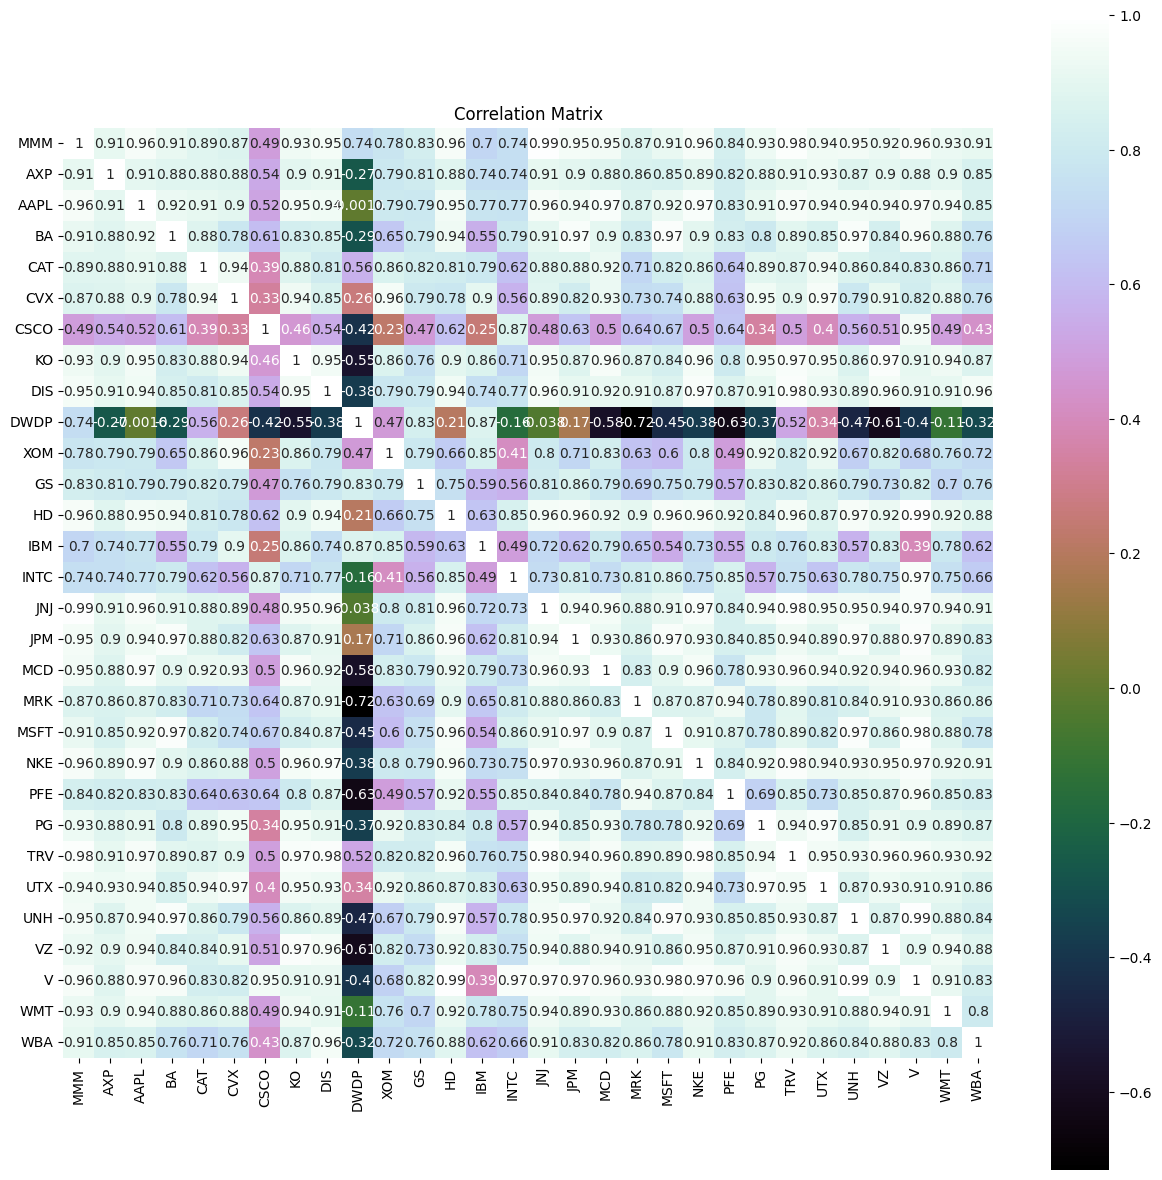

In [25]:
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

### Step 3 - Data Cleaning and Preprocessing


In [26]:
# checking for empty values in dataset
print('Null Values =',dataset.isnull().values.any())

Null Values = True


In [27]:
# we drop unreliable columns that missing more than 30%. We also could fill them with 0 or mean
# for example column DWDP misses 4441 values
print(dataset["DWDP"].isnull().sum(axis = 0))
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)
missing_fractions.head(10)
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

4441


(4804, 28)

In [28]:
# Other null with last value available in the dataset. 
dataset=dataset.fillna(method='ffill')
dataset= dataset.dropna(axis=0)
dataset.head(5)

MMM     AXP   AAPL      BA     CAT     CVX    CSCO      KO  \
Date                                                                        
2000-01-03  29.847  35.477  3.531  26.650  14.561  21.582  43.004  16.984   
2000-01-04  28.661  34.134  3.233  26.610  14.372  21.582  40.577  17.041   
2000-01-05  30.122  33.959  3.280  28.474  14.914  22.049  40.895  17.228   
2000-01-06  31.877  33.959  2.996  28.553  15.459  22.903  39.782  17.210   
2000-01-07  32.510  34.434  3.138  29.382  15.962  23.306  42.129  18.342   

               DIS     XOM  ...    MSFT    NKE     PFE      PG     TRV  \
Date                        ...                                          
2000-01-03  23.522  23.862  ...  38.135  4.701  16.747  32.228  20.159   
2000-01-04  24.900  23.405  ...  36.846  4.445  16.122  31.596  19.890   
2000-01-05  25.782  24.569  ...  37.235  4.702  16.416  31.326  20.086   
2000-01-06  24.900  25.959  ...  35.989  4.678  16.973  32.438  20.122   
2000-01-07  24.506  25.883  ...  36.460  4.678  18.123  35.024  20.922   

               UTX    UNH      VZ     WMT     WBA  
Date                                               
2000-01-03  21.319  5.841  22.564  47.338  21.713  
2000-01-04  20.446  5.766  21.834  45.566  20.907  
2000-01-05  20.255  5.753  22.564  44.503  21.097  
2000-01-06  20.998  5.964  22.449  45.127  20.527  
2000-01-07  21.831  6.663  22.283  48.535  21.052  

[5 rows x 28 columns]

### Step 4 - Data Transformation

Let's use the linear function pct_change() that calculates the percentage change between the current and a prior element.

In [29]:
datareturns = dataset.pct_change(1)

#Remove Outliers beyong 3 standard deviation which would drop outliers of 0.2 percent
datareturns= datareturns[datareturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(datareturns)

# RESCALED DATASET
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns),columns = datareturns.columns, index = datareturns.index)

datareturns.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head(5)

MMM    AXP   AAPL     BA    CAT    CVX   CSCO     KO    DIS  \
Date                                                                        
2000-01-11 -1.713  0.566 -2.708 -1.133 -1.041 -0.787 -1.834  3.569  0.725   
2000-01-20 -3.564  1.077  3.304 -1.670 -2.834 -0.446  0.022  0.987 -2.415   
2000-02-02 -1.687 -1.913 -0.806  1.298  0.311 -0.582 -2.018 -3.228  2.527   
2000-02-03 -0.881 -0.557  2.291 -1.869 -1.689 -1.187  2.023 -2.161  1.213   
2000-02-04 -2.758 -0.643  2.284  0.809 -0.053 -2.840  1.649  1.882  0.451   

              XOM  ...   MSFT    NKE    PFE     PG    TRV    UTX    UNH  \
Date               ...                                                    
2000-01-11  0.981  ... -1.936  3.667 -0.173  1.772 -0.936 -1.954  0.076   
2000-01-20 -1.897  ... -0.733 -1.816 -1.421 -2.742 -0.476 -1.916  1.654   
2000-02-02  0.599  ... -1.570  1.136 -2.313 -1.019 -3.905  0.037  1.739   
2000-02-03 -1.489  ...  2.012  0.632 -0.895 -0.971 -3.592 -1.288 -0.684   
2000-02-04 -1.587  ...  2.049 -1.904  0.260 -3.521  0.316 -2.466  1.621   

               VZ    WMT    WBA  
Date                             
2000-01-11 -0.836 -1.375  2.942  
2000-01-20  0.241 -0.987 -0.036  
2000-02-02 -0.389 -0.501  0.303  
2000-02-03 -1.289 -0.020 -0.191  
2000-02-04  0.149 -3.250  0.770  

[5 rows x 28 columns]

Then, visualize log-returns for the dataset DJIA

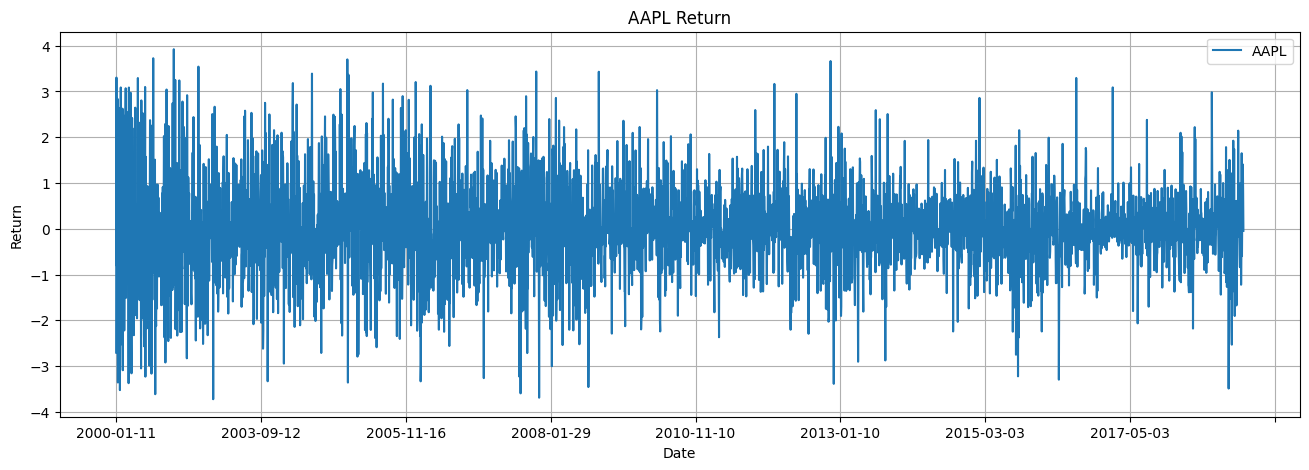

In [31]:
plt.figure(figsize=(16, 5))
plt.title("AAPL Return")
plt.ylabel("Return")
rescaledDataset.AAPL.plot()
plt.grid(True);
plt.legend()
plt.show()

### Step 5 - Model Training

In [32]:
percentage = int(len(rescaledDataset) * 0.8)
X_train = rescaledDataset[:percentage]
X_test = rescaledDataset[percentage:]

X_train_raw = datareturns[:percentage]
X_test_raw = datareturns[percentage:]


stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)

In [34]:
# First Dimension Reducation Model - PCA

pca = PCA()
PrincipalComponent=pca.fit(X_train)

In [35]:
pca.components_[0]

array([-0.2278224 , -0.22835766, -0.15302828, -0.18969933, -0.20200012,
       -0.17810558, -0.19508121, -0.16845303, -0.20820442, -0.19308548,
       -0.20879404, -0.20231768, -0.19939638, -0.19521427, -0.16686975,
       -0.22806024, -0.15153408, -0.169941  , -0.19367262, -0.17118841,
       -0.18993347, -0.16805969, -0.197612  , -0.22658993, -0.13821257,
       -0.16688803, -0.16897835, -0.16070821])

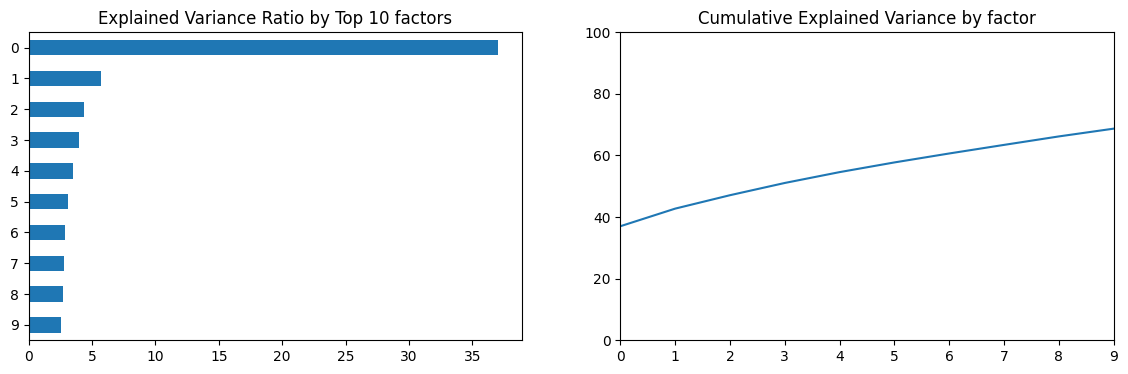

In [49]:
# Fetching Explained PCA Variables

NumEigenvalues=10
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="",title='Explained Variance Ratio by Top 10 factors',ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title='Cumulative Explained Variance by factor');

# Explained Variable
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

We investigated that the primary factor accounts for approximately 40% of the daily return fluctuations. This predominant factor is often regarded as "the market," subject to the findings of a more detailed examination. The graph on the right displays the cumulative explained variance(cEV), revealing that nearly 10 factors account for 73% of the returns in this extensive cross-section of stocks.

### Calculated Weights

In [38]:
def PCWeights():
    weights = pd.DataFrame()

    # components of our direct model
    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

In [39]:
weights[0]

array([0.04341287, 0.04351486, 0.02916042, 0.0361483 , 0.03849228,
       0.03393904, 0.03717385, 0.03209969, 0.03967455, 0.03679355,
       0.0397869 , 0.0385528 , 0.03799613, 0.0371992 , 0.03179799,
       0.04345819, 0.02887569, 0.03238323, 0.03690543, 0.03262094,
       0.03619291, 0.03202474, 0.0376561 , 0.04317801, 0.0263372 ,
       0.03180147, 0.0321998 , 0.03062387])

In [40]:
pca.components_[0]

array([-0.2278224 , -0.22835766, -0.15302828, -0.18969933, -0.20200012,
       -0.17810558, -0.19508121, -0.16845303, -0.20820442, -0.19308548,
       -0.20879404, -0.20231768, -0.19939638, -0.19521427, -0.16686975,
       -0.22806024, -0.15153408, -0.169941  , -0.19367262, -0.17118841,
       -0.18993347, -0.16805969, -0.197612  , -0.22658993, -0.13821257,
       -0.16688803, -0.16897835, -0.16070821])

array([[<Axes: title={'center': 'Portfolio 0'}>],
       [<Axes: title={'center': 'Portfolio 1'}>],
       [<Axes: title={'center': 'Portfolio 2'}>],
       [<Axes: title={'center': 'Portfolio 3'}>],
       [<Axes: title={'center': 'Portfolio 4'}>]], dtype=object)

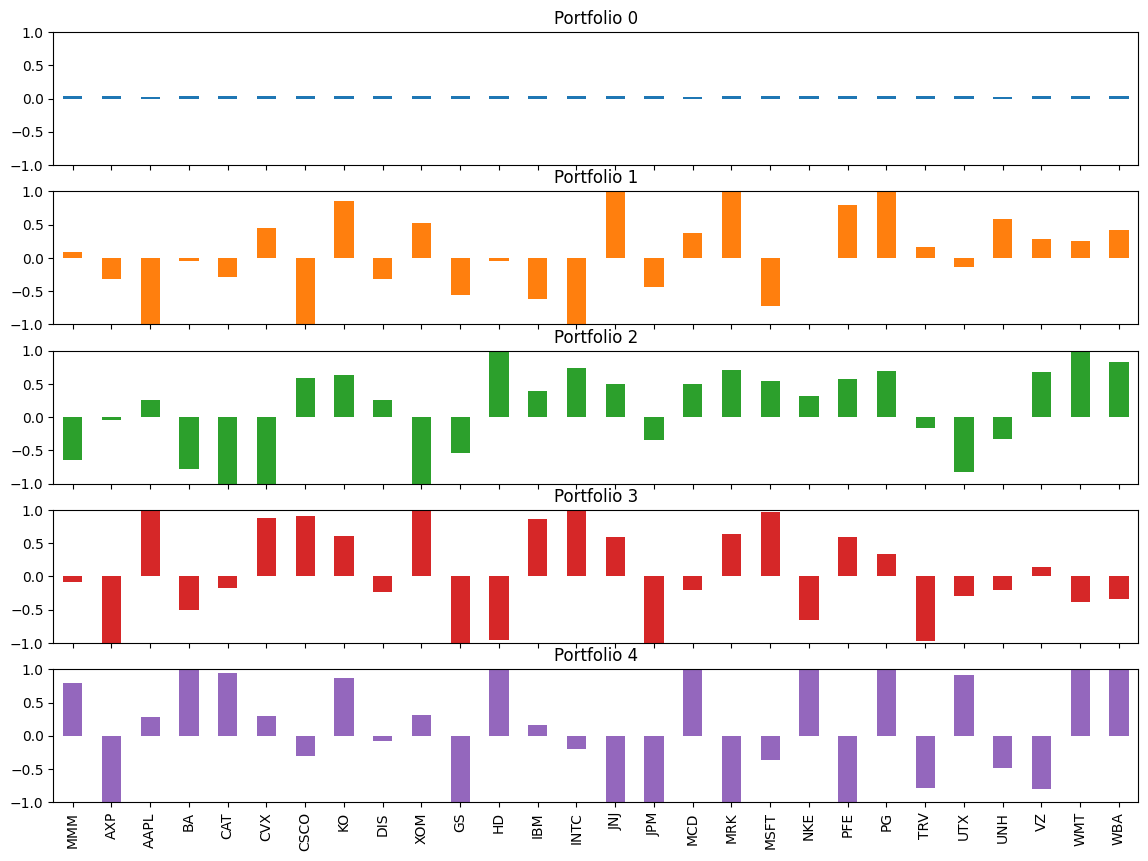

In [41]:
# Visualizing Portfolios depending on numComponents

numComponents=5

# Top Portfolios
topPortfolios = pd.DataFrame(pca.components_[:numComponents], columns=dataset.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range( numComponents)]
np.sqrt(pca.explained_variance_)

eigen_portfolios.T.plot.bar(subplots=True, layout=(int(numComponents),1), figsize=(14,10), legend=False, sharey=True, ylim= (-1,1))

<Axes: >

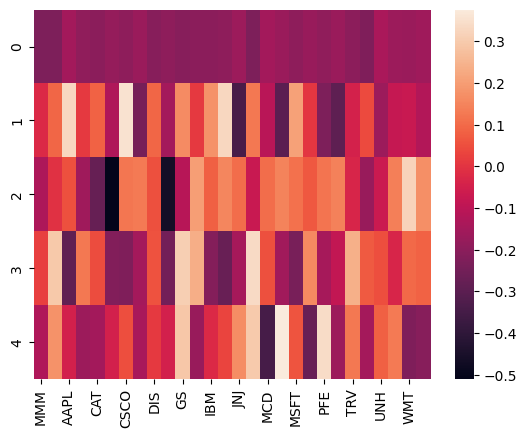

In [42]:

sns.heatmap(topPortfolios) 

Analysis - From the above diagrams, we can observe which contribution of various stocks in each eigenvector.

### Determining the Best Portfolio through sharpe ratio

To determine the optimal eigen portfolios we utilize the Sharpe ratio as a performance metric that illustrates the annualized returns in relation to the annualized volatility for each company index in a portfolio. A high Sharpe ratio signifies greater returns and/or reduced volatility for the given portfolio. 

The annualized Sharpe ratio is calculated by dividing the annualized returns by the annualized volatility. To compute the annualized return, we use the geometric average of all returns concerning the periods per year (trading days within a year).

 The annualized volatility is determined by taking the standard deviation of the returns and multiplying it by the square root of the periods per year.

In [44]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    # parameter ts_returns is returns of one eigen portfolio.
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

By going through the loop, we calculate each eigen portfolio and then we will compare return with respective sharpe ratio

In [46]:
import warnings
warnings.filterwarnings('ignore')

Eigen portfolio #0 with the highest Sharpe. Return 11.47%, vol = 13.31%, Sharpe = 0.86
    Return    Vol  Sharpe
0    0.115  0.133   0.862
7    0.096  0.693   0.138
5    0.100  0.845   0.118
1    0.057  0.670   0.084
2   -0.107  0.859  -0.124
11  -1.000  7.228  -0.138
13  -0.399  2.070  -0.193
25  -1.000  5.009  -0.200
23  -1.000  4.955  -0.202
6   -0.416  1.967  -0.212
10  -0.158  0.738  -0.213
3   -0.162  0.738  -0.220
26  -1.000  4.535  -0.220
8   -0.422  1.397  -0.302
17  -0.998  3.277  -0.305
24  -0.550  1.729  -0.318
16  -0.980  3.038  -0.323
21  -0.470  1.420  -0.331
14  -0.886  2.571  -0.345
27  -0.933  2.606  -0.358


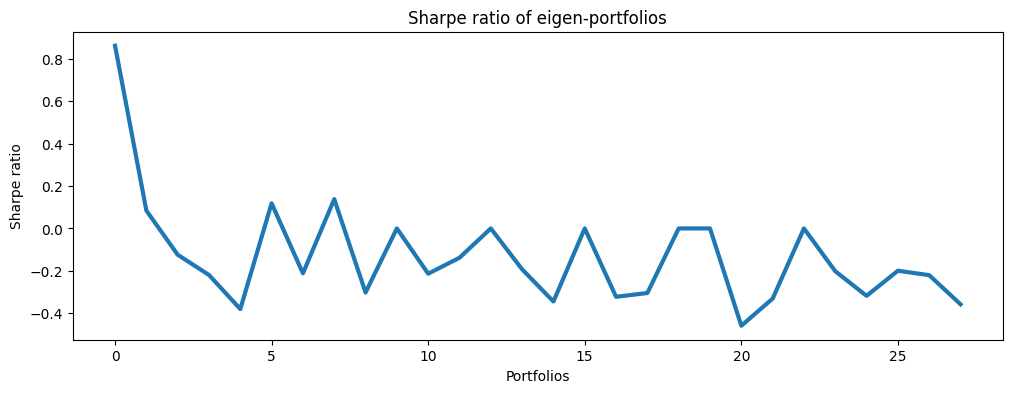

In [47]:
def optimizedPortfolio():
    n_portfolios = len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 
    stock_tickers = rescaledDataset.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = pcs[i] / sum(pcs[i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_prti_returns = np.dot(X_train_raw.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_train_raw.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    # using argmax func we can the protfolio with highest sharpe value
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()

optimizedPortfolio()

Sum of weights of current eigen-portfolio: 100.00


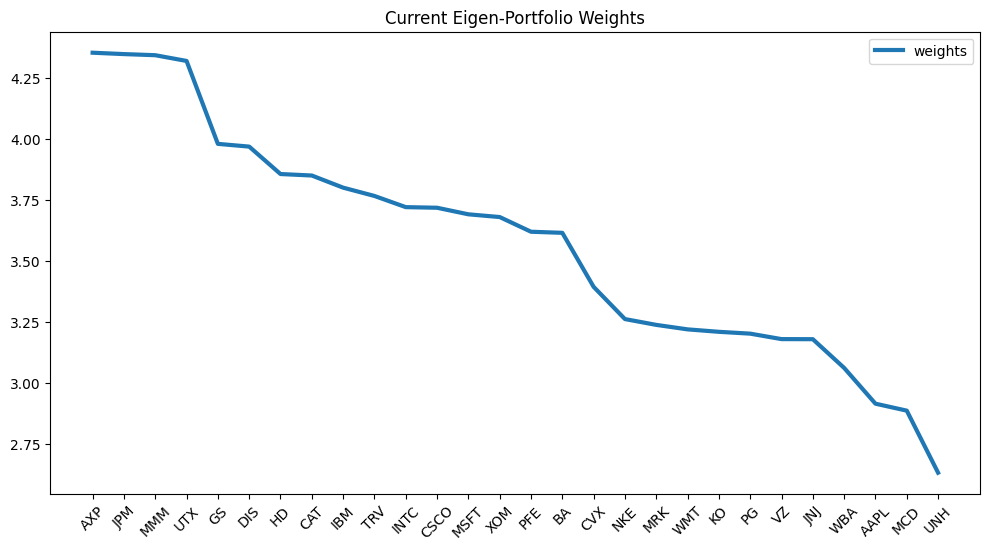

weights
AXP     4.351
JPM     4.346
MMM     4.341
UTX     4.318
GS      3.979
DIS     3.967
HD      3.855
CAT     3.849
IBM     3.800
TRV     3.766
INTC    3.720
CSCO    3.717
MSFT    3.691
XOM     3.679
PFE     3.619
BA      3.615
CVX     3.394
NKE     3.262
MRK     3.238
WMT     3.220
KO      3.210
PG      3.202
VZ      3.180
JNJ     3.180
WBA     3.062
AAPL    2.916
MCD     2.888
UNH     2.634

In [48]:
weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

# the weight in the chart will be presented in percentages

plotEigen(weights=weights[0], plot=True)

### Step 6 - Backtesting

As a final step, we will conduct a Backtest on test set. We will plot Principle components returns against real returns.

Current Eigen-Portfolio:
Return = 32.76%
Volatility = 68.64%
Sharpe = 0.48


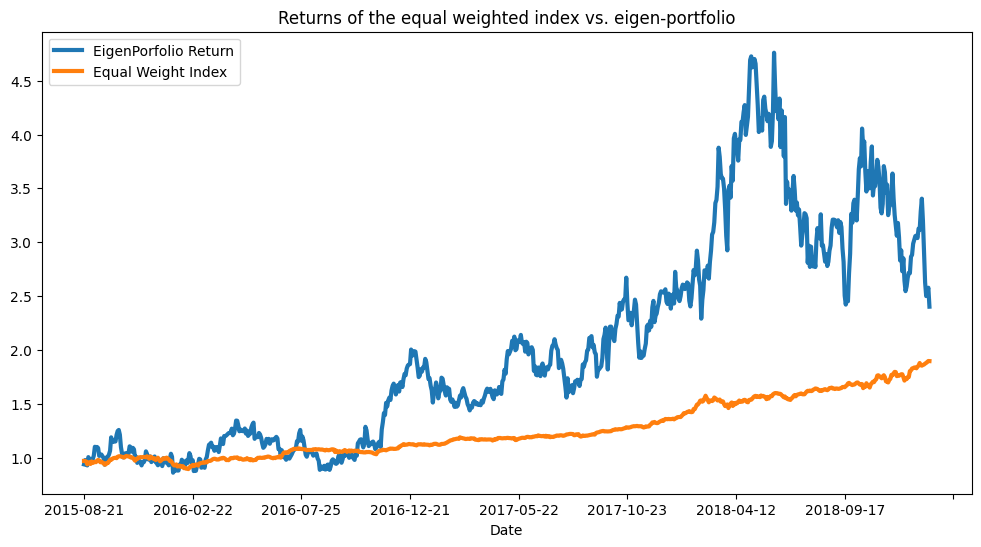

Current Eigen-Portfolio:
Return = 99.80%
Volatility = 58.34%
Sharpe = 1.71


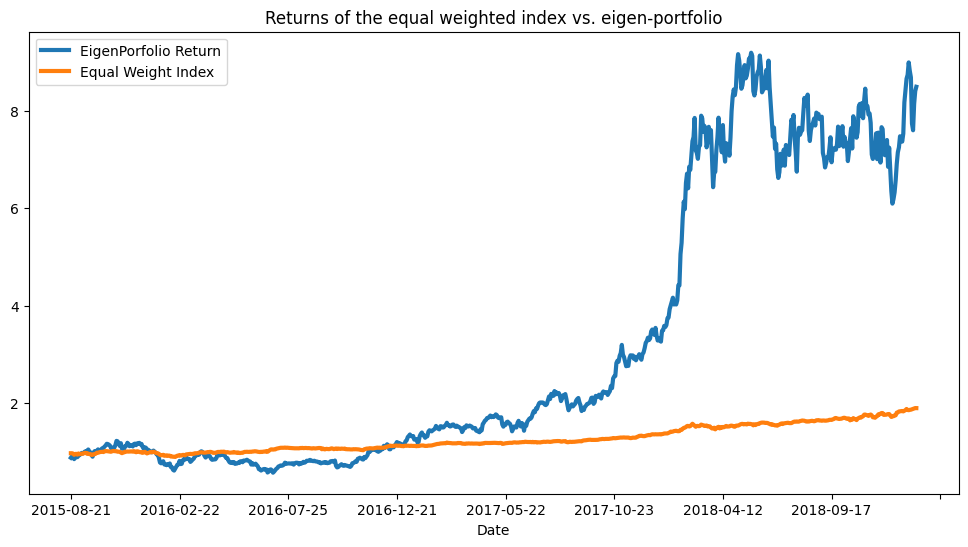

Current Eigen-Portfolio:
Return = -79.42%
Volatility = 185.30%
Sharpe = -0.43


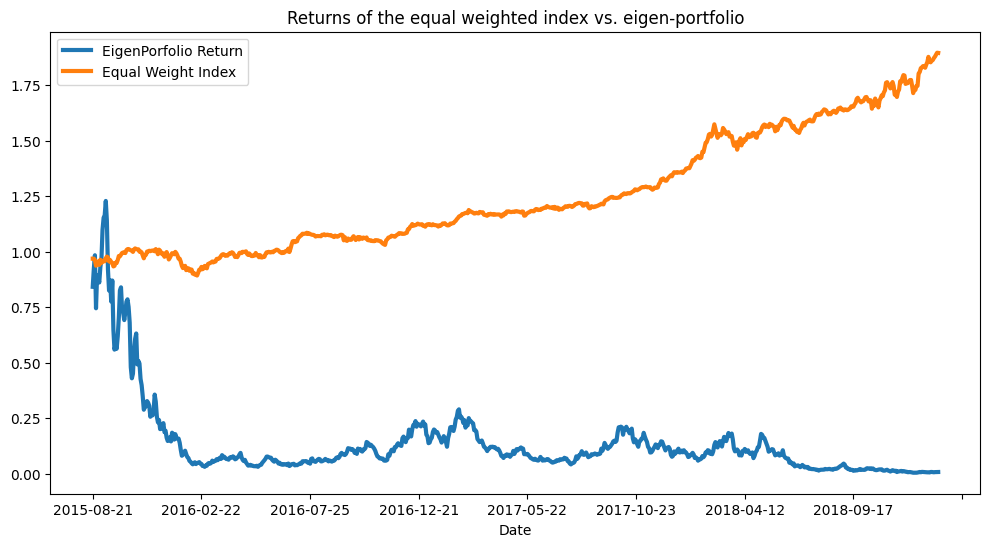

In [50]:
def Backtest(eigen):
    eigen_prtfi = pd.DataFrame(data ={'weights': eigen.squeeze()}, index = stock_tickers)
    eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)    

    eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test_raw.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)  
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    equal_weight_return=(X_test_raw * (1/len(pca.components_))).sum(axis=1)    
    df_plot = pd.DataFrame({'EigenPorfolio Return': eigen_portfolio_returns, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the equal weighted index vs. eigen-portfolio' , 
                          figsize=(12,6), linewidth=3)
    plt.show()
    
Backtest(eigen=weights[5])
Backtest(eigen=weights[1])
Backtest(eigen=weights[14])

As we can see in charts above the eigen portfolio return of the top portfolios outperform the equally weighted portfolio and the eigen portfolio ranked place 19 underperform the market crucially in the test set.

###Conclusion
We have depicted that the first eigen portfolio embodies a systematic risk factor, while other eigen portfolios may represent company or industry factors in terms of the underlying intuition. We also investigated the diversification advantages provided by eigen portfolios, as they are derived using PCA and are independent. Examining the backtesting outcomes, the portfolio that performs best in the training set also yields the best result in the test set. Through PCA, we result independent eigen portfolios that deliver higher returns and Sharpe ratios compared to the market.